In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/ch11/DOM_hourly.csv'
df = pd.read_csv(url)
df

,Datetime,DOM_MW
0,2005-12-31 01:00:00,9389.0
1,2005-12-31 02:00:00,9070.0
2,2005-12-31 03:00:00,9001.0
3,2005-12-31 04:00:00,9042.0
4,2005-12-31 05:00:00,9132.0
...,...,...
116184,2018-01-01 20:00:00,18418.0
116185,2018-01-01 21:00:00,18567.0
116186,2018-01-01 22:00:00,18307.0
116187,2018-01-01 23:00:00,17814.0


In [3]:
# Extract the values of the time series
values = df["DOM_MW"].values

In [4]:
# Normalize the data using a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
values = scaler.fit_transform(values.reshape(-1, 1))

In [5]:
# Define the length of the training sequence
seq_length = 24 * 7

In [6]:
# Split the data into training and testing sets
train_size = int(len(values) * 0.7)
train = values[:train_size]
test = values[train_size:]

In [7]:
# Create sequences of input/output pairs
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length), 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

In [8]:
train_X, train_y = create_sequences(train, seq_length)
test_X, test_y = create_sequences(test, seq_length)

In [9]:
# Reshape the data to match the input shape of the LSTM
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [10]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

2023-02-16 11:19:51.024155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# Train the model
model.fit(train_X, train_y, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
1269/1269 [==============================] - 90s 70ms/step - loss: 0.0033
Epoch 2/10
1269/1269 [==============================] - 94s 74ms/step - loss: 5.4990e-04
Epoch 3/10
1269/1269 [==============================] - 95s 75ms/step - loss: 3.5566e-04
Epoch 4/10
1269/1269 [==============================] - 97s 76ms/step - loss: 3.2531e-04
Epoch 5/10
1269/1269 [==============================] - 101s 80ms/step - loss: 2.9784e-04
Epoch 6/10
1269/1269 [==============================] - 99s 78ms/step - loss: 2.8456e-04
Epoch 7/10
1269/1269 [==============================] - 98s 77ms/step - loss: 2.7469e-04
Epoch 8/10
1269/1269 [==============================] - 96s 76ms/step - loss: 2.6303e-04
Epoch 9/10
1269/1269 [==============================] - 95s 75ms/step - loss: 2.5702e-04
Epoch 10/10
1269/1269 [==============================] - 96s 76ms/step - loss: 2.4489e-04


In [12]:
# Make predictions on the testing data
predictions = model.predict(test_X)

1084/1084 [==============================] - 17s 15ms/step


In [13]:
# Inverse transform the predictions and actual values to get back to the original scale
predictions = scaler.inverse_transform(predictions)
test_y = scaler.inverse_transform(test_y.reshape(-1, 1))

In [14]:
import matplotlib.pyplot as plt

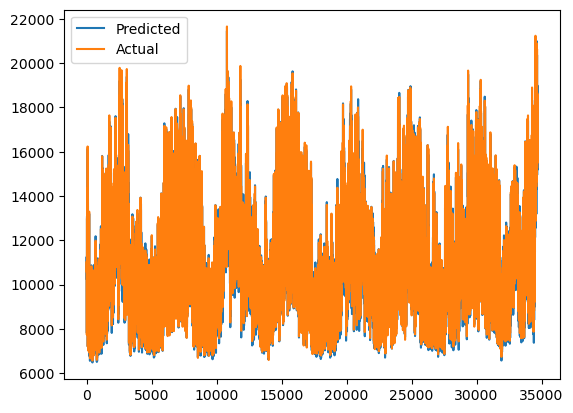

In [15]:
# Plot the predicted and actual values
plt.plot(predictions, label="Predicted")
plt.plot(test_y, label="Actual")
plt.legend()
plt.show()

In [16]:
# Print the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_y) ** 2))
print("RMSE: ", rmse)

RMSE:  379.0226996176824


In [17]:
from sklearn.metrics import r2_score

In [18]:
# Calculate the R-squared score
r2 = r2_score(test_y, predictions)
print(f'Testing set R-squared score: {r2}')

Testing set R-squared score: 0.9773008551694842
